# Single Layer Neural Network

## 1. Basic Usage of TensofFlow
- References
  - https://www.tensorflow.org/versions/r0.11/get_started/basic_usage.html
  - https://www.tensorflow.org/versions/r0.11/resources/dims_types.html
- **TensorFlow** is a programming system in which you represent computations as graphs. 
- Nodes in the graph are called **operations**. 
  - An operation takes zero or more Tensors, performs some computation, and produces zero or more Tensors. 
- A **Tensor** is a typed multi-dimensional array. 

In [1]:
import tensorflow as tf

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
print "matrix1 -", matrix1
print "matrix2 -", matrix2
print

matrix3 = tf.matmul(matrix1, matrix2)
print "matrix3 -", matrix3
matrix4 = tf.matmul(matrix2, matrix1)
print "matrix4 -", matrix4
print

matrix5 = tf.constant([[1., 1.], [2., 2.]])
print "matrix5 -", matrix5
matrix6 = tf.constant([10., 100.])
print "matrix6 -", matrix6
print



matrix7 = matrix5 + matrix6
print "matrix7 -", matrix7
matrix8 = matrix5 * matrix6
print "matrix8 -", matrix8

matrix8 = tf.constant([[1., 1.], [2., 2.]])
print "matrix8 -", matrix8
matrix9 = tf.ones([2])
print "matrix9 -", matrix9

matrix10 = matrix8 + matrix9  #broadcast
print "matrix10 -", matrix10

print 

sess = tf.Session()
matrix3_result = sess.run(matrix3)
print "matrix3_result -\n", matrix3_result

matrix4_result = sess.run(matrix4)
print "matrix4_result -\n", matrix4_result

matrix7_result = sess.run(matrix7)
print "matrix7_result -\n", matrix7_result

matrix10_result = sess.run(matrix10)
print "matrix10_result -\n", matrix10_result

matrix1 - Tensor("Const:0", shape=(1, 2), dtype=float32)
matrix2 - Tensor("Const_1:0", shape=(2, 1), dtype=float32)

matrix3 - Tensor("MatMul:0", shape=(1, 1), dtype=float32)
matrix4 - Tensor("MatMul_1:0", shape=(2, 2), dtype=float32)

matrix5 - Tensor("Const_2:0", shape=(2, 2), dtype=float32)
matrix6 - Tensor("Const_3:0", shape=(2,), dtype=float32)

matrix7 - Tensor("add:0", shape=(2, 2), dtype=float32)
matrix8 - Tensor("mul:0", shape=(2, 2), dtype=float32)
matrix8 - Tensor("Const_4:0", shape=(2, 2), dtype=float32)
matrix9 - Tensor("ones:0", shape=(2,), dtype=float32)
matrix10 - Tensor("add_1:0", shape=(2, 2), dtype=float32)

matrix3_result -
[[ 12.]]
matrix4_result -
[[ 6.  6.]
 [ 6.  6.]]
matrix7_result -
[[  11.  101.]
 [  12.  102.]]
matrix10_result -
[[ 2.  2.]
 [ 3.  3.]]


## 2. MNIST handwritten digits image set
- Note1: http://yann.lecun.com/exdb/mnist/
- Note2: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


- Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:
<img src="https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png" width="50%" />

- flatten 1-D tensor of size 28x28 = 784.
  - Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.
$$[0, 0, 0, ..., 0.6, 0.7, 0.7, 0.5, ... 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.3, ..., 0.4, 0.4, 0.4, ... 0, 0, 0]$$ 

In [3]:
print type(mnist.train.images), mnist.train.images.shape
print type(mnist.train.labels), mnist.train.labels.shape

<type 'numpy.ndarray'> (55000, 784)
<type 'numpy.ndarray'> (55000, 10)


- Number of train images is 55000.
- **mnist.train.images** is a tensor with a shape of [55000, 784]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-xs.png" width="50%" />

- A one-hot vector is a vector which is 0 in most entries, and 1 in a single entry.
- In this case, the $n$th digit will be represented as a vector which is 1 in the nth entry. 
  - For example, 3 would be $[0,0,0,1,0,0,0,0,0,0]$. 
- **mnist.train.labels** is a tensor with a shape of [55000, 10]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-ys.png" width="48%" />

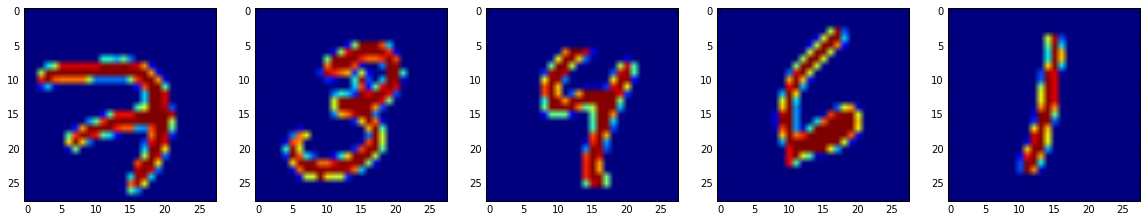

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = np.array(mnist.train.images[i])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

## 3. Neural Network Model

- Input Layer to Output Layer
 - $i=1...784$
 - $j=1...10$
$$ u_j = \sum_i W_{ji} x_i + b_j $$

- Presentation of Matrix and Vector
  - Shape of ${\bf W} = 10 \times 784$
  - Shape of ${\bf x} = 784 \times 1$
  - Shape of ${\bf b} = 10 \times 1$
  - Shape of ${\bf u} = 10 \times 1$
$$ {\bf u} = {\bf Wx + b} $$

In [6]:
batch_images, batch_labels = mnist.train.next_batch(1)
print batch_images.shape
print batch_images
print

print batch_labels.shape
print batch_labels

(1, 784)
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.  

-  Transposed Matrix Operation in Tensorflow
  - Shape of ${\bf x} = 1 \times 784$
  - Shape of ${\bf W} = 784 \times 10$
  - Shape of ${\bf b} = 1 \times 10$
  - Shape of ${\bf u} = 1 \times 10$
$$ {\bf u} = {\bf xW + b} $$ 

In [7]:
batch_images, batch_labels = mnist.train.next_batch(100)
print batch_images.shape
print batch_images
print

print batch_labels.shape
print batch_labels

(100, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

(100, 10)
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1

- Mini Batch (ex. batch size = 100)  
  - Shape of ${\bf x} = 100 \times 784$
  - Shape of ${\bf W} = 784 \times 10$
  - Shape of ${\bf b} = 100 \times 10$
  - Shape of ${\bf u} = 100 \times 10$
$$ {\bf U} = {\bf XW + B} $$  

In [8]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
print "x -", x

x - Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


In [9]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print "W -", W
print "b -", b

W - <tensorflow.python.ops.variables.Variable object at 0x11f11e0d0>
b - <tensorflow.python.ops.variables.Variable object at 0x11f11e810>


- softmax

$$ {\bf z} = softmax({\bf u}) $$

In [10]:
u = tf.matmul(x, W) + b
z = tf.nn.softmax(u)
print "z -", z

z - Tensor("Softmax:0", shape=(?, 10), dtype=float32)


- we also need to add a new placeholder to input the correct answers (ground truth):

In [11]:
z_ = tf.placeholder(tf.float32, [None, 10])

- Error functions
 - Squarred error
 - Using maximum likelihood estimation
 - Cross entropy

In [12]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(z_ * tf.log(z), reduction_indices=[1]))

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 4. Training

In [26]:
init = tf.initialize_all_variables()

In [27]:
sess = tf.Session()
sess.run(init)

In [28]:
for i in range(1000):
    batch_images, batch_labels = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_images, z_: batch_labels})

## 5. Evaluation

In [29]:
print type(mnist.test.images), mnist.test.images.shape
print type(mnist.test.labels), mnist.test.labels.shape

<type 'numpy.ndarray'> (10000, 784)
<type 'numpy.ndarray'> (10000, 10)


[0 1 3 ..., 9 7 8]
[0 1 3 ..., 9 7 8]
0.9175
825
Error Index: 4, Prediction: 9, Ground Truth: 7
Error Index: 11, Prediction: 8, Ground Truth: 2
Error Index: 23, Prediction: 8, Ground Truth: 6
Error Index: 24, Prediction: 5, Ground Truth: 6
Error Index: 40, Prediction: 2, Ground Truth: 1


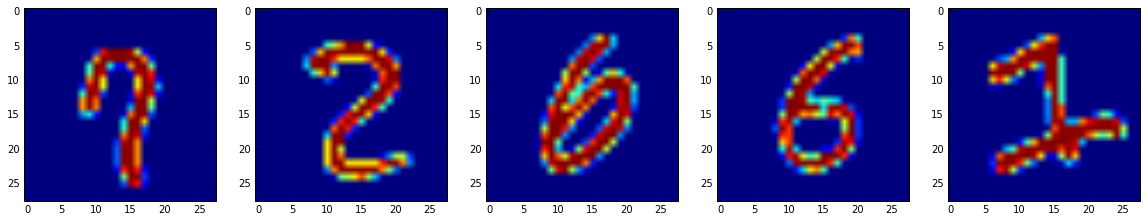

In [53]:
batch_x, batch_y = mnist.test.next_batch(10000)
prediction = sess.run(tf.argmax(z, 1), feed_dict={x:batch_x})
ground_truth = sess.run(tf.argmax(z_, 1), feed_dict={z_:batch_y})

print prediction
print ground_truth

sum = 0
diff_index_list = []
for i in range(10000):
    if (prediction[i] == ground_truth[i]):
        sum = sum + 1
    else:
        diff_index_list.append(i)
        #print "%d - %d: %s" % (diff_a[i], diff_b[i], diff_a[i] == diff_b[i])

print sum / 10000.0
print len(diff_index_list)

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    j = diff_index_list[i]
    print "Error Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j])
    img = np.array(mnist.test.images[j])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

In [54]:
prediction_ground_truth = tf.equal(tf.argmax(z, 1), tf.argmax(z_, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_ground_truth, tf.float32))

In [55]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, z_: mnist.test.labels}))

0.9175


## 6. All in one

In [56]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
u = tf.matmul(x, W) + b
z = tf.nn.softmax(u)

z_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(z_ * tf.log(z), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        batch_images, batch_labels = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_images, z_: batch_labels})
    prediction_ground_truth = tf.equal(tf.argmax(z, 1), tf.argmax(z_, 1))
    accuracy = tf.reduce_mean(tf.cast(prediction_ground_truth, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, z_: mnist.test.labels}))

0.9158
